 # Dr. Kativa Agarwal RNA-seq analysis of VK2 cells


# RNASeq RSEM Quality Control and Counts Preparation

* Daisy Chilin-Fuentes, CCBB (dchilinfuentes@ucsd.edu)
* Based on upstream analysis by Daisy Chilin-Fuentes, CCBB (dchilinfuentes@ucsd.edu)


## Table of Contents
* [Background](#Background)
* [Introduction](#Introduction)
* [Parameter Input](#Parameter-Input)
* [Library Import](#Library-Import)
* [Quality Control Visualization](#Quality-Control-Visualization)
* [MultiQC Report](#MultiQC-Report)
* [Counts Extraction](#Counts-Extraction)
* [Summary](#Summary)
* [Citations](#Citations)
* [Appendix: R Session Info](#Appendix:-R-Session-Info)


## Background

The count data analyzed in this notebook were produced by the primary analysis of Daisy Chilin-Fuentes of CCBB, who received raw sequencing data and performed quality control (Fastqc v0.11.8),  alignment (STAR v2.5.1a), and quantification (RSEMv1.3.0) of reads using GRCh38.p13.genome.fa and gencode.v38.annotation.gtf.


[Table of Contents](#Table-of-Contents)

## Introduction

This notebook takes in results of the RSEM ([1](#Citations)) RNASeq transcript quantification method, generates both custom and MultiQC-created ([2](#Citations)) quality control metrics, and extracts a per-sample-per-gene count file for use in future analyses.

[Table of Contents](#Table-of-Contents)

## Parameter Input

In [2]:
gDataDir = "../primary_analysis_results"
gOutputCountsFilename = "counts.txt"

In [3]:
gOutputDir = "../secondary_analysis_results"
gMultiQcReportFileName = "multiqc_report.html"
gRsemCountsFp = file.path(gDataDir, "all_counts_results.txt")
gRsemGenesFp = file.path(gDataDir, "all_genes_results.txt")
gMultiQcReportFp = file.path(gDataDir, gMultiQcReportFileName)
gOutputDir_nb0b <- paste0(gOutputDir, "/RSEM_QC_and_Counts_Preparation")
dir.create(gOutputDir_nb0b)
gInternalMultiQcFp = file.path(gOutputDir_nb0b, gMultiQcReportFileName)
gOutputCountsFp = file.path(gOutputDir_nb0b, gOutputCountsFilename)

[Table of Contents](#Table-of-Contents)

## Library Import

Import the necessary R ([3](#Citations)) libraries:

In [ ]:
# install.packages("splitstackshape")

In [5]:
library(IRdisplay)
library(splitstackshape)
library(dplyr)
library(tibble)

In [6]:
# This line prevents SVG output, which interacts badly with export to HTML
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))

[Table of Contents](#Table-of-Contents)


# Quality Control Visualization

Load the read counts and generate visualizations of the total number of reads, number of aligned reads, and fraction of reads uniquely aligned for each sample based on the alignment statistics produced by RSEM.  See https://github.com/deweylab/RSEM/blob/master/cnt_file_description.txt for a full description of these statistics.

In [7]:
stats <- read.csv(gRsemCountsFp, sep="\t", stringsAsFactors=F)

In [8]:
options(warn=-1) #hides warnings

stats_names <- colnames(stats)
colnames(stats) <- stats_names[2:length(stats_names)]
l <- length(stats_names)-1
stats <- stats[,1:l]
stats_t <- t(stats)
stats_t_sub <- stats_t[,1:3]
qc <- cSplit(stats_t_sub, c("alignment_statistics", "alignment_certainty", "alignment_Hits"), sep=" ")
qc <- as.data.frame(qc)
rownames(qc) <- rownames(stats_t_sub)
colnames(qc) <- c("Num_unaligned", "Num_aligned", "Num_filtered", "Num_Total_Reads", "nUnique_reads", "nMulti_reads", "nUncertain_reads",
                "x", "nHits_num_total_alignments", "Read_type_SE1_PE2", "y", "z")
qc

,Num_unaligned,Num_aligned,Num_filtered,Num_Total_Reads,nUnique_reads,nMulti_reads,nUncertain_reads,x,nHits_num_total_alignments,Read_type_SE1_PE2,y,z
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>,<int>,<int>,<lgl>,<lgl>
VK2_NanH2_PolyB25_1h_5.cnt_counts,779740,27470349,0,28250089,25996749,1473600,20712710,NA,132336174,3,NA,NA
VK2_NanH2_PolyB25_1h_6.cnt_counts,857212,24937754,0,25794966,23591479,1346275,18455934,NA,118633276,3,NA,NA
VK2_NanH2_PolyB25_1h_7.cnt_counts,789548,26927704,0,27717252,25509947,1417757,20484666,NA,130789796,3,NA,NA
VK2_NanH2_PolyB25_1h_8.cnt_counts,960745,29313699,0,30274444,27715537,1598162,21972323,NA,141192415,3,NA,NA
VK2_NanH2_PolyB25_2h_1.cnt_counts,791822,22492500,0,23284322,21256990,1235510,16608713,NA,106883383,3,NA,NA
VK2_NanH2_PolyB25_2h_2.cnt_counts,958812,31234720,0,32193532,29541432,1693288,23250475,NA,149707549,3,NA,NA
VK2_NanH2_PolyB25_2h_3.cnt_counts,806285,21902994,0,22709279,20709375,1193619,16215814,NA,104584086,3,NA,NA
VK2_NanH2_PolyB25_2h_4.cnt_counts,674348,19638447,0,20312795,18594753,1043694,14832633,NA,95076413,3,NA,NA
VK2_Pet28a_PolyB25_2h_10.cnt_counts,623507,20896103,0,21519610,19746901,1149202,15535180,NA,100092168,3,NA,NA


In [9]:
# Calculate fraction of reads aligned, and fraction of reads uniquely aligned
qc$fraction_aligned <- qc$Num_aligned/qc$Num_Total_Reads
qc$fraction_unique_aligned <- qc$nUnique_reads/qc$Num_Total_Reads
qc

,Num_unaligned,Num_aligned,Num_filtered,Num_Total_Reads,nUnique_reads,nMulti_reads,nUncertain_reads,x,nHits_num_total_alignments,Read_type_SE1_PE2,y,z,fraction_aligned,fraction_unique_aligned
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>,<int>,<int>,<lgl>,<lgl>,<dbl>,<dbl>
VK2_NanH2_PolyB25_1h_5.cnt_counts,779740,27470349,0,28250089,25996749,1473600,20712710,NA,132336174,3,NA,NA,0.9723987,0.9202360
VK2_NanH2_PolyB25_1h_6.cnt_counts,857212,24937754,0,25794966,23591479,1346275,18455934,NA,118633276,3,NA,NA,0.9667682,0.9145769
VK2_NanH2_PolyB25_1h_7.cnt_counts,789548,26927704,0,27717252,25509947,1417757,20484666,NA,130789796,3,NA,NA,0.9715142,0.9203635
VK2_NanH2_PolyB25_1h_8.cnt_counts,960745,29313699,0,30274444,27715537,1598162,21972323,NA,141192415,3,NA,NA,0.9682655,0.9154763
VK2_NanH2_PolyB25_2h_1.cnt_counts,791822,22492500,0,23284322,21256990,1235510,16608713,NA,106883383,3,NA,NA,0.9659933,0.9129315
VK2_NanH2_PolyB25_2h_2.cnt_counts,958812,31234720,0,32193532,29541432,1693288,23250475,NA,149707549,3,NA,NA,0.9702172,0.9176201
VK2_NanH2_PolyB25_2h_3.cnt_counts,806285,21902994,0,22709279,20709375,1193619,16215814,NA,104584086,3,NA,NA,0.9644954,0.9119345
VK2_NanH2_PolyB25_2h_4.cnt_counts,674348,19638447,0,20312795,18594753,1043694,14832633,NA,95076413,3,NA,NA,0.9668018,0.9154207
VK2_Pet28a_PolyB25_2h_10.cnt_counts,623507,20896103,0,21519610,19746901,1149202,15535180,NA,100092168,3,NA,NA,0.9710261,0.9176236


In [10]:
# suppress scientific notation in plot labels
options(scipen=5) 

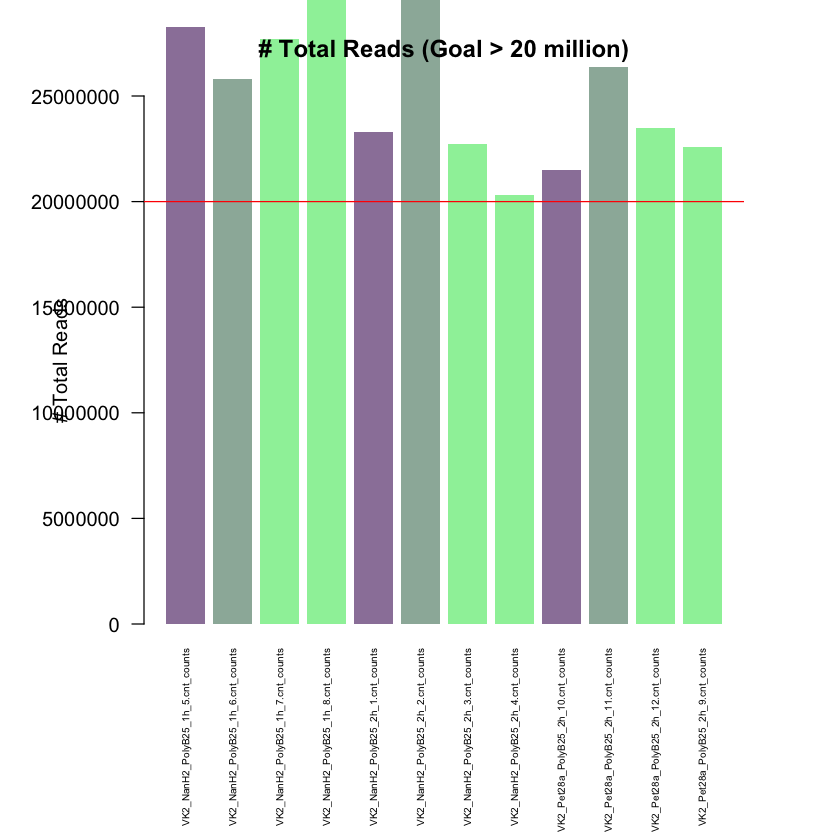

In [11]:
#Plot number of total reads for each sample
par(mar = c(7, 4, 2, 2) + 2)
# Basic Barplot
my_bar=barplot(qc$Num_Total_Reads,  border=F , names.arg=rownames(qc) , las=2 , 
               col=c(rgb(0.3,0.1,0.4,0.6) , rgb(0.3,0.5,0.4,0.6) , 
                rgb(0.3,0.9,0.4,0.6) ,  rgb(0.3,0.9,0.4,0.6)) ,
               ylim=c(0,25000000) , ylab = "# Total Reads", main="# Total Reads (Goal > 20 million)", cex.names = 0.5)
abline(h=20000000, col='red') 

#labs <- rownames(qc)
#text(cex=.5,  labs, xpd=TRUE, srt=45)

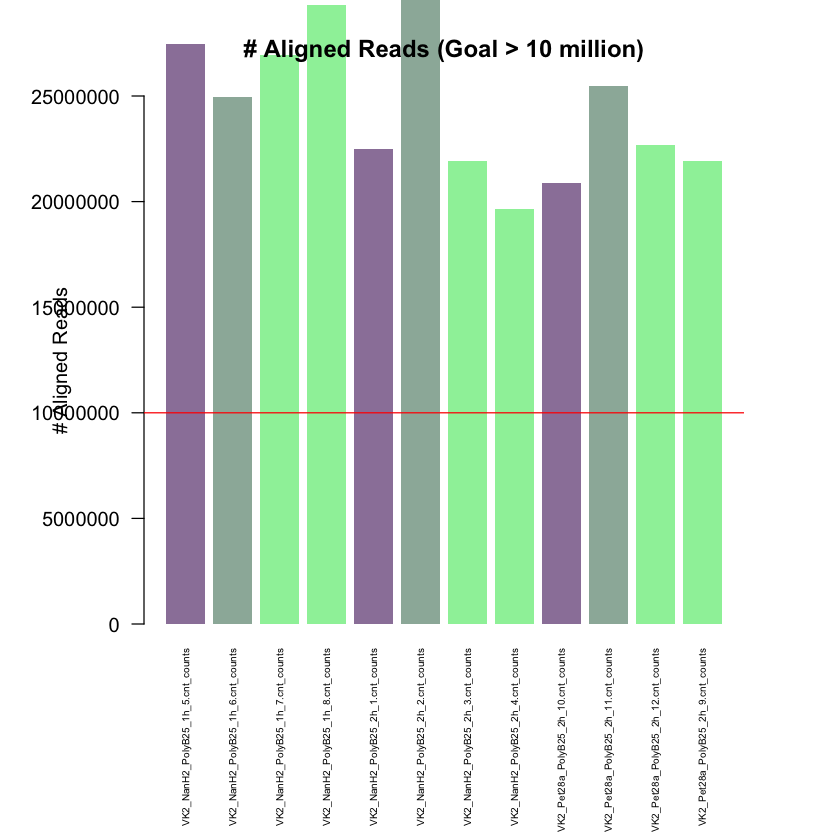

In [12]:
#Plot number of aligned reads for each sample
par(mar = c(7, 4, 2, 2) + 2)
# Basic Barplot
my_bar=barplot(qc$Num_aligned,  border=F , names.arg=rownames(qc) , las=2 , 
               col=c(rgb(0.3,0.1,0.4,0.6) , rgb(0.3,0.5,0.4,0.6) , 
                rgb(0.3,0.9,0.4,0.6) ,  rgb(0.3,0.9,0.4,0.6)) ,
               ylim=c(0,25000000) , ylab = "# Aligned Reads", main="# Aligned Reads (Goal > 10 million)",
              cex.names = 0.5)
abline(h=10000000, col='red') 

#labs <- rownames(qc)
#text(cex=.5,  labs, xpd=TRUE, srt=45)

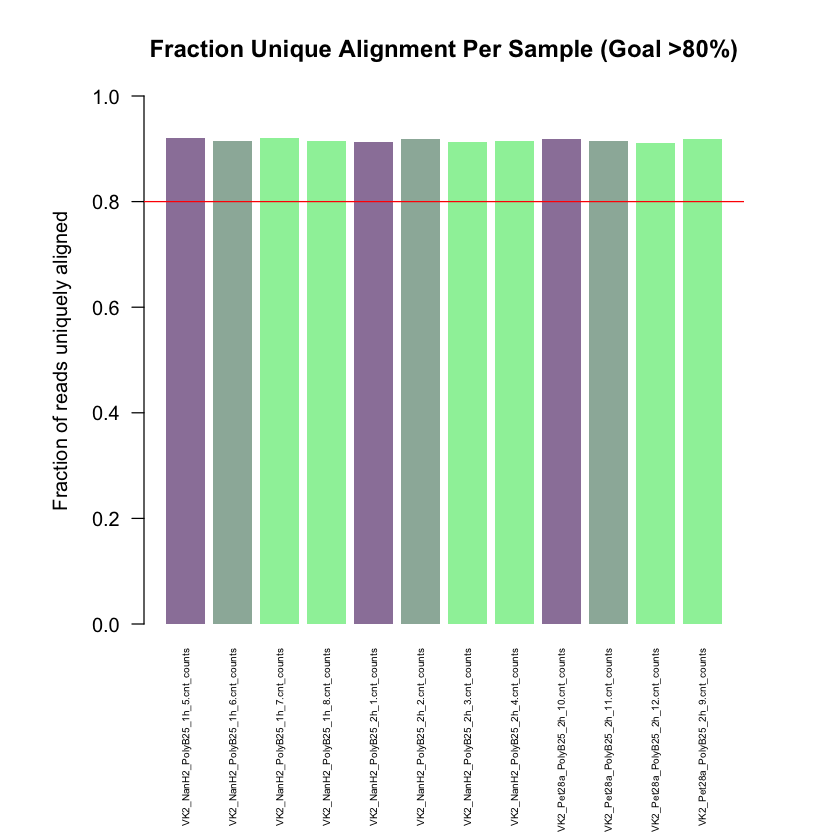

In [13]:
#Plot fraction of reads uniquely aligned for each sample
par(mar = c(7, 4, 2, 2) + 2)
# Basic Barplot
my_bar=barplot(qc$fraction_unique_aligned,  border=F , names.arg=rownames(qc) , las=2 , 
               col=c(rgb(0.3,0.1,0.4,0.6) , rgb(0.3,0.5,0.4,0.6) , 
                rgb(0.3,0.9,0.4,0.6) ,  rgb(0.3,0.9,0.4,0.6)) ,
               ylim=c(0,1) , ylab = "Fraction of reads uniquely aligned", main="Fraction Unique Alignment Per Sample (Goal >80%)",
              cex.names = 0.5)
abline(h=0.8, col='red') 
#labs <- rownames(qc)
#text(cex=.5,  labs, xpd=TRUE, srt=45)

All samples exceed the minimum requirements for number of total reads, number of aligned reads, and fraction of uniquely aligned reads. Based on this, there do not appear to be any concerns about quality.


[Table of Contents](#Table-of-Contents)


# MultiQC Report

Move the MultiQC report created in the primary analysis to the output directory and display it here for examination:

In [14]:
system(paste("cp", gMultiQcReportFp, gInternalMultiQcFp))

In [15]:
IRdisplay::display_html(paste0('<iframe src="', gInternalMultiQcFp, '" width=1000, height=1000></iframe> '))

As shown in the FastQC Sequence Quality Histograms, although the report shows that all 24 samples failed, the mean per-position Phred scores are high (above 30) at all base pairs except for the first bp, indicating high sequence quality.  Low quality scores at the beginning of each read could possibly be an artifact from the software. 

Levels of Overrepresented sequences and Adapter Content are low, suggesting that the library prep was also of high quality.
   


[Table of Contents](#Table-of-Contents)


# Counts Extraction

Extract raw counts column from RSEM output per sample. 

In [16]:
loadAndCleanStarRsemAllGeneResults = function(rsemGenesFp, sep="\t"){
    rsemGenesDf = read.table(rsemGenesFp, header = TRUE, sep=sep, stringsAsFactors=FALSE)
    geneCountsDf <- rsemGenesDf[,sapply(colnames(rsemGenesDf), function(x) any(grepl(".results_expected_count",x)))]
    colnames(geneCountsDf) <- gsub(".genes.results_expected_count","", colnames(geneCountsDf))
    row.names(geneCountsDf) <- rsemGenesDf$gene_id   
    return(geneCountsDf)
}

In [17]:
gUnorderedGeneCountsDf = loadAndCleanStarRsemAllGeneResults(gRsemGenesFp)

In [18]:
dim(gUnorderedGeneCountsDf)
head(gUnorderedGeneCountsDf)

[1] 60649    12

,VK2_NanH2_PolyB25_1h_5,VK2_NanH2_PolyB25_1h_6,VK2_NanH2_PolyB25_1h_7,VK2_NanH2_PolyB25_1h_8,VK2_NanH2_PolyB25_2h_1,VK2_NanH2_PolyB25_2h_2,VK2_NanH2_PolyB25_2h_3,VK2_NanH2_PolyB25_2h_4,VK2_Pet28a_PolyB25_2h_10,VK2_Pet28a_PolyB25_2h_11,VK2_Pet28a_PolyB25_2h_12,VK2_Pet28a_PolyB25_2h_9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003.15,502.00,416.00,424.00,497.00,356.00,542.00,364.00,299.00,387.00,465.00,366.00,323.00
ENSG00000000005.6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000000419.14,2340.00,2232.04,2253.00,2573.36,2080.11,3080.00,2206.80,1721.00,2084.00,2412.42,2170.07,1904.05
ENSG00000000457.14,153.65,94.84,112.33,130.23,113.88,119.35,85.84,102.65,98.34,120.36,91.56,119.77
ENSG00000000460.17,254.35,200.16,242.67,292.77,181.12,285.65,181.16,209.35,189.66,190.64,204.44,234.23
ENSG00000000938.13,10.00,6.00,6.00,9.00,4.00,21.00,10.00,18.00,13.00,17.00,13.00,10.00


"The pseudoautosomal regions (PAR), where chromosome X and Y share homologous sequence, are defined by the GRC for human" (https://uswest.ensembl.org/info/genome/genebuild/human_PARS.html).  From Gencode annotation release 25 onward, "[g]ene and trancript [sic] ids on the chrY PAR regions have '\_PAR\_Y' ... appended ... to avoid redundancy" (https://www.gencodegenes.org/pages/data_format.html).  In some cases, a given accession appears in both normal and "PAR_Y" form (e.g., "ENSG00000002586.1" and "ENSG00000002586.19_PAR_Y"), indicating that this gene has multiple copies, including one in the pseudoautosomal region (https://www.biostars.org/p/398174/#398179).  In this case, RSEM splits the counts for reads that map to this gene between these two accessions, which must then be recombined.

In [19]:
collapseParCounts = function(geneCountsDf){
    # all gene names include both "regular" (e.g., ENSG00000002586.1) and 
    # par (pseudoautosomal region, e.g. ENSG00000002586.19_PAR_Y) names
    all_gene_names <- rownames(geneCountsDf)

    # TODO: also look for par x?
    par_y_gene_names <- all_gene_names[grep("_PAR_Y", all_gene_names)]
    regularized_par_gene_names <- gsub("_PAR_Y","", par_y_gene_names)
    
    num_par_y_genes = length(par_y_gene_names)
    print(num_par_y_genes)
    if (num_par_y_genes == 0){
     # no need to do anything
     return(geneCountsDf)
    }

    print(par_y_gene_names)

    # Make a dataframe of the counts for the par y genes, but name the rows for those genes'
    # regular counterparts
    parGeneCountsByRegularGeneNameDf <- subset(geneCountsDf, all_gene_names %in% par_y_gene_names)
    rownames(parGeneCountsByRegularGeneNameDf) <- regularized_par_gene_names
    
    # Turn implicit rownames in dataframes into an explicit "rowname" column
    # so we can group and summarize by them
    allGeneCountsWithRownamesColDf = rownames_to_column(geneCountsDf)
    parGeneCountsByRegularGeneNameWithRownamesDf = rownames_to_column(
        parGeneCountsByRegularGeneNameDf)
    
    # Take rows for all the real counts, rownamed with whatever original name they had--regular or par--
    # and then add on some *duplicate* rows that hold the counts for the par y genes *but* with rownames of their
    # regular (NON-par) equivalent gene
    allGeneCountsMergedWithParGeneCountsDf = bind_rows(allGeneCountsWithRownamesColDf, 
                                                       parGeneCountsByRegularGeneNameWithRownamesDf)
    
    # Group rows by rowname
    # NB: dplyr's group_by is returning a "tibble", NOT a dataframe
    countsGroupedByRownamesTibble = group_by(allGeneCountsMergedWithParGeneCountsDf, rowname)
    
    # summarize the counts by rowname; since we made copies of the par records *and* renamed them with
    # the name of the regular gene they are associated with, summing has the effect of adding the counts
    # for the par genes to the counts for their regular counterpart, under the regular counterpart's name.
    # Note that the original par records ALSO still exist in the resulting tibble, untouched.
    countsSummedByRownamesTibble = summarize_all(countsGroupedByRownamesTibble, sum)

    # Now go back and remove the original par records, leaving a result that contains only 
    # regular genes, where any par counts have been added to the counts for the associated regular gene
    nonParGeneCountsTibble <- subset(countsSummedByRownamesTibble, !(all_gene_names %in% par_y_gene_names))
    
    # convert "rowname" column back to an implicit rowname (which also converts tibble to data frame)
    # bc outputting a "rowname" column instead of embedded rownames screws up the format of the output file.
    collapsedCountsDf = column_to_rownames(nonParGeneCountsTibble, var = "rowname")    
    return(collapsedCountsDf) 
}

In [20]:
gCollapsedUnorderedGeneCountsDf = collapseParCounts(gUnorderedGeneCountsDf)

[1] 44
 [1] "ENSG00000002586.20_PAR_Y" "ENSG00000124333.16_PAR_Y"
 [3] "ENSG00000124334.17_PAR_Y" "ENSG00000167393.18_PAR_Y"
 [5] "ENSG00000169084.15_PAR_Y" "ENSG00000169093.16_PAR_Y"
 [7] "ENSG00000169100.14_PAR_Y" "ENSG00000178605.13_PAR_Y"
 [9] "ENSG00000182162.11_PAR_Y" "ENSG00000182378.15_PAR_Y"
[11] "ENSG00000182484.15_PAR_Y" "ENSG00000185203.12_PAR_Y"
[13] "ENSG00000185291.12_PAR_Y" "ENSG00000185960.14_PAR_Y"
[15] "ENSG00000196433.13_PAR_Y" "ENSG00000197976.12_PAR_Y"
[17] "ENSG00000198223.17_PAR_Y" "ENSG00000205755.12_PAR_Y"
[19] "ENSG00000214717.12_PAR_Y" "ENSG00000223274.6_PAR_Y" 
[21] "ENSG00000223484.7_PAR_Y"  "ENSG00000223511.7_PAR_Y" 
[23] "ENSG00000223571.6_PAR_Y"  "ENSG00000223773.7_PAR_Y" 
[25] "ENSG00000225661.7_PAR_Y"  "ENSG00000226179.6_PAR_Y" 
[27] "ENSG00000227159.8_PAR_Y"  "ENSG00000228410.6_PAR_Y" 
[29] "ENSG00000228572.7_PAR_Y"  "ENSG00000229232.6_PAR_Y" 
[31] "ENSG00000230542.6_PAR_Y"  "ENSG00000234622.6_PAR_Y" 
[33] "ENSG00000234958.6_PAR_Y"  "ENSG00000236017.

In [21]:
dim(gUnorderedGeneCountsDf)
dim(gCollapsedUnorderedGeneCountsDf)

[1] 60649    12

[1] 60605    12

Write out the resulting gene counts to a tab-delimited text file:

In [22]:
write.table(gCollapsedUnorderedGeneCountsDf, gOutputCountsFp, sep = "\t")

[Table of Contents](#Table-of-Contents)

## Summary

**QC metrics**
* All samples exceed the minimum requirements for number of total reads (>=20M), number of aligned reads (>=10M), and fraction of uniquely aligned reads (>=80%). Based on this, there do not appear to be any concerns about quality.

**Comments about MultiQC/FastQC stats**
* As shown in the FastQC Sequence Quality Histograms, the mean per-position Phred scores are high (above 30), indicating high sequence quality.  Levels of Overrepresented sequences and Adapter Content are low, suggesting that the library prep was also of high quality.


[Table of Contents](#Table-of-Contents)

## Citations

1. Li B, Dewey CN. RSEM: accurate transcript quantification from RNA-Seq data with or without a reference genome. BMC Bioinformatics. 2011 Aug 4;12:323.
2. Ewels P, Magnusson M, Lundin S, Käller M. MultiQC: summarize analysis results  for multiple tools and samples in a single report. Bioinformatics. 2016 Oct 1;32(19):3047-8.
3. R Core Team (2016). R: A language and environment for statistical computing. R Foundation for Statistical Computing, Vienna, Austria. URL https://www.R-project.org/.

[Table of Contents](#Table-of-Contents)

## Appendix: R Session Info

In [23]:
Sys.time()
sessionInfo()

[1] "2023-03-02 16:10:28 MST"

R version 4.1.3 (2022-03-10)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur/Monterey 10.16

Matrix products: default
BLAS/LAPACK: /Users/dchilinfuentes/opt/anaconda3/envs/RNAseq_env/lib/libopenblasp-r0.3.20.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.1.8          dplyr_1.0.9           splitstackshape_1.4.8
[4] IRdisplay_1.1        

loaded via a namespace (and not attached):
 [1] magrittr_2.0.3    tidyselect_1.1.2  uuid_1.1-0        R6_2.5.1         
 [5] rlang_1.0.4       fastmap_1.1.0     fansi_1.0.3       tools_4.1.3      
 [9] data.table_1.14.2 utf8_1.2.2        DBI_1.1.3         cli_3.3.0        
[13] htmltools_0.5.3   assertthat_0.2.1  digest_0.6.29     lifecycle_1.0.1  
[17] crayon_1.5.1      purrr_0.3.4       repr_1.1.4        base64enc_0.1-3  
[21] vctrs_0.4.1       IRkernel_1.3

[Table of Contents](#Table-of-Contents)

Copyright (c) 2018 UC San Diego Center for Computational Biology & Bioinformatics under the MIT License

Notebook template by Amanda Birmingham